In [1]:
import pandas as pd
import sys
import tensorflow as tf
sys.path.append('..')
from training.Helpers import metrics,make_model_nn,load_nn_data,take_params,test_nn_model
from tqdm import tqdm
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [7]:
tf.test.gpu_device_name()

''

In [2]:
pos =  {
    'dense1':[32,64,173,128,256],
    'dense2':[64,128,256,512],
    'drop2':[0.1,0],
    'dense3':[64,128,256,512,1024],
    'drop3':[0.1,0,0.2],
    'dense4':[64,128,256,512,1024],
    'drop4':[0.1,0,0.2],
    'dense5':[64,128,256],
    'dense6':[64,128,256],
    'drop6':[0.1,0,0.2],
    'bn':[0,1]
}

In [3]:
diff_params = take_params(pos,1000)
pd.DataFrame(diff_params).to_pickle(f'../results/best_hist_nn.pkl')

In [4]:
results = []
best_acc_30k = -1
for id,params in tqdm(enumerate(diff_params)):
    history = []
    for sample_size in [1000,2000,5000,8000,10000,15000,20000,30000]:
        X_train,X_val,y_train,y_val = load_nn_data(sample_size)
        model = make_model_nn(params)
        h = model.fit(X_train, y_train, batch_size=128, epochs=150, validation_data=(X_val, y_val), 
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True,start_from_epoch=30)],verbose =0)
        
        h2  = {
            'val_loss':h.history['val_loss'],
            'val_accuracy':h.history['val_accuracy'],
            'loss':h.history['loss'],
            'accuracy':h.history['accuracy'],
            'sample_size' : sample_size,
        }
        
        history.append(h2)
        
        res = test_nn_model(model)
        res['sample_size'] = sample_size
        res['params_id'] = id
        results.append(res)
    
    pd.DataFrame(results).to_pickle(f'../results/res_nn_.pkl')
    if res['accuracy_score'] > best_acc_30k:
        best_acc_30k = res['accuracy_score']
        pd.DataFrame(history).to_pickle(f'../results/best_hist_nn.pkl')
        

1it [07:01, 421.09s/it]


KeyboardInterrupt: 

In [126]:
results = []
for sample_size in [1000,2000,5000,8000,10000,15000,20000,30000]:
    X_train,X_val,y_train,y_val = load_nn_data(sample_size)
    model = make_model(params)
    h = model.fit(X_train, y_train, batch_size=128, epochs=150, validation_data=(X_val, y_val), 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True,start_from_epoch=30)])
    
    history  = {
        'val_loss':h.history['val_loss'],
        'val_accuracy':h.history['val_accuracy'],
        'loss':h.history['loss'],
        'accuracy':h.history['accuracy'],
        'sample_size' : sample_size,
    }
    
    res = test_nn_model(model)
    res['sample_size'] = sample_size
    results.append(res)

Epoch 1/150
6/6 [==============================] - 2s 45ms/step - loss: 577.2158 - accuracy: 0.0071 - val_loss: 130.9742 - val_accuracy: 0.0033
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 199.4464 - accuracy: 0.0100 - val_loss: 39.5973 - val_accuracy: 0.0100
Epoch 3/150
6/6 [==============================] - 0s 10ms/step - loss: 108.9437 - accuracy: 0.0186 - val_loss: 20.3671 - val_accuracy: 0.0133
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 71.5282 - accuracy: 0.0100 - val_loss: 13.2498 - val_accuracy: 0.0066
Epoch 5/150
6/6 [==============================] - 0s 10ms/step - loss: 50.0059 - accuracy: 0.0086 - val_loss: 9.4296 - val_accuracy: 0.0100
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 38.3791 - accuracy: 0.0114 - val_loss: 6.1746 - val_accuracy: 0.0100
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 29.6024 - accuracy: 0.0143 - val_loss: 5.1851 - val_accuracy: 0.0266
Epoch 8

KeyboardInterrupt: 

In [128]:
pd.DataFrame(results)

,accuracy_score,balanced_accuracy_score,recall_score,f1_score,sample_size
0,0.018855,0.01,0.01,0.000370,1000
1,0.028683,0.01,0.01,0.000558,2000
2,0.028683,0.01,0.01,0.000558,5000
3,0.028683,0.01,0.01,0.000558,8000
4,0.028683,0.01,0.01,0.000558,10000
5,0.028683,0.01,0.01,0.000558,15000


In [111]:
import matplotlib.pyplot as plt

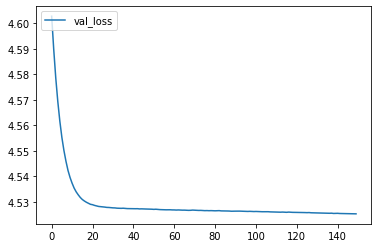

In [118]:
#plt.plot(history[6].history['loss'], label="train_loss")
plt.plot(history[6].history['val_loss'], label="val_loss")

plt.legend(loc=2)